In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
import itertools

%matplotlib inline

## Lab vanishing gradient


In this lab you will impement a complete exploration and results visualization for the following experiment configurations  with dense neural networks:

- with the following numbers of layers [2,3,4,5,6,7,8,9,10]
- with the following neurons per layer [3,5,10,30]
- with activations ReLU, Sigmoid and LeakyReLU

In total, you must train and test 36 network architectures for each activation function.

The experimentation must be done with the MNIST Digits datasets (1500 items) using a random partition of 50/50 for train and test.

For each configuration you must record the **accuracy in test** and the **time used to train** the model.

Then, you will need to build the following visualizations

- one heat map for each activation function illustrating the **accuracy in test** for each configuration
- one heat map for each activation function illustrating the **time used to train** for each configuration
- a scatter plot of all your experiments, showing:
    - the time used to train in the x-axis
    - the accuracy in test in the y-axis
    - the number of layers as the size of the dots
    - expetiments for each activation function in different colors   
- a bar plot showing the average performance of each activation function for each number of layers.




Your visualizations must look similar to these ones:

![alt text](./Images/lab_vanishing_01.png)
![alt text](./Images/lab_vanishing_02.png)
![alt text](./Images/lab_vanishing_03.png)
![alt text](./Images/lab_vanishing_04.png)
![alt text](./Images/lab_vanishing_05.png)


In [4]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print "dimension de las imagenes y las clases", X.shape, y.shape

dimension de las imagenes y las clases (1500, 784) (1500,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train = X_train
X_test  = X_test
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print X_train.shape, y_train_oh.shape

(1200, 784) (1200, 10)


In [6]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras


In [7]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [8]:
layers=[2,3,4,5,6,7,8,9,10]
activations=["relu", "sigmoid", "leakyRelu"]
#cuando sea leakyrelu toca poner la fn de activacion directamente =tf.nn.leaky_relu
neuro=[3,5,10,30]

r_testA1 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])
                     
r_testA1

r_testA2 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])

r_testA3 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])

r_testT1 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])

r_testT2 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])

r_testT3 = pd.DataFrame(np.zeros((len(neuro), len(layers)))*np.nan, index=[str(i) for i in neuro],
                      columns=[str(i) for i in layers])


#model = get_model(num_hidden_layers=10, activation="sigmoid")
#!rm -rf log/sigmoid
#tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
#model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback])

def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [9]:
import time 
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)
    
time_callback = TimeHistory()
model = get_model(input_dim=784, output_dim=10, num_hidden_layers=3, hidden_size=3, activation="relu")
tb_callback = keras.callbacks.TensorBoard(log_dir='./log/relu', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)

model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback, time_callback])



Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 858us/step - loss: 2.2715 - acc: 0.1083 - val_loss: 2.2394 - val_acc: 0.0700
Epoch 2/30
1200/1200 [==============================] - 0s 79us/step - loss: 2.1908 - acc: 0.1533 - val_loss: 2.1681 - val_acc: 0.1267
Epoch 3/30
1200/1200 [==============================] - 0s 81us/step - loss: 2.1153 - acc: 0.1758 - val_loss: 2.1093 - val_acc: 0.1700
Epoch 4/30
1200/1200 [==============================] - 0s 80us/step - loss: 2.0597 - acc: 0.2008 - val_loss: 2.0714 - val_acc: 0.1633
Epoch 5/30
1200/1200 [==============================] - 0s 80us/step - loss: 2.0252 - acc: 0.2092 - val_loss: 2.0434 - val_acc: 0.1633
Epoch 6/30
1200/1200 [==============================] - 0s 90us/step - loss: 2.0015 - acc: 0.2167 - val_loss: 2.0212 - val_acc: 0.1667
Epoch 7/30
1200/1200 [==============================] - 0s 92us/step - loss: 1.9813 - acc: 0.2150 - val_loss: 2.0074 - val_acc: 0.1733
Epoch 8

In [10]:
times = time_callback.times
t=0
for i in range(0,len(times)):
    t = t+times[i]
 

In [11]:
t

5.352856636047363

In [12]:
import tensorflow as tf
del model

for l, a, n in itertools.product(layers, activations, neuro):
    
    if a=="relu": 
        model = get_model(input_dim=784, output_dim=10, num_hidden_layers=l, hidden_size=n, activation=a)
        #!rm -rf log/relu
        tb_callback = keras.callbacks.TensorBoard(log_dir='./log/relu', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
        model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback, time_callback])
        
        preds_train = model.predict(X_train).argmax(axis=1)
        preds_test = model.predict(X_test).argmax(axis=1)
        acc=(np.mean(preds_test==y_test))
        r_testA1.loc[str(n),str(l)]=acc
        acc=0
        times = time_callback.times
        t=0
        for i in range(0,len(times)):
            t = t+times[i]
            
        r_testT1.loc[str(n),str(l)]=t
        
    if a=="sigmoid": 
        model = get_model(input_dim=784, output_dim=10, num_hidden_layers=l, hidden_size=n, activation=a)
        #!rm -rf log/sigmoid
        tb_callback = keras.callbacks.TensorBoard(log_dir='./log/sigmoid', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
        model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback, time_callback])
        
        preds_train = model.predict(X_train).argmax(axis=1)
        preds_test = model.predict(X_test).argmax(axis=1)
        acc=(np.mean(preds_test==y_test))
        r_testA2.loc[str(n),str(l)]=acc
        acc=0
        times = time_callback.times
        t=0
        for i in range(0,len(times)):
            t = t+times[i]
            
        r_testT2.loc[str(n),str(l)]=t
       
        
    if a=="leakyRelu": 
        model = get_model(input_dim=784, output_dim=10, num_hidden_layers=l, hidden_size=n, activation=tf.nn.leaky_relu)
        #!rm -rf log/leaky_relu
        tb_callback = keras.callbacks.TensorBoard(log_dir='./log/leaky_relu', histogram_freq=1,  write_grads=True, write_graph=True, write_images=True)
        model.fit(X_train, y_train_oh, epochs=30, batch_size=32, validation_data=(X_test, y_test_oh), callbacks=[tb_callback, time_callback])
        
        preds_train = model.predict(X_train).argmax(axis=1)
        preds_test = model.predict(X_test).argmax(axis=1)
        acc=(np.mean(preds_test==y_test))
        r_testA3.loc[str(n),str(l)]=acc
        acc=0
        times = time_callback.times
        t=0
        for i in range(0,len(times)):
            t = t+times[i]
            
        r_testT3.loc[str(n),str(l)]=t
   

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 0s 401us/step - loss: 2.2624 - acc: 0.1233 - val_loss: 2.2277 - val_acc: 0.1567
Epoch 2/30
1200/1200 [==============================] - 0s 83us/step - loss: 2.1908 - acc: 0.1600 - val_loss: 2.1732 - val_acc: 0.1700
Epoch 3/30
1200/1200 [==============================] - 0s 81us/step - loss: 2.1443 - acc: 0.1633 - val_loss: 2.1297 - val_acc: 0.1833
Epoch 4/30
1200/1200 [==============================] - 0s 72us/step - loss: 2.1031 - acc: 0.1683 - val_loss: 2.0996 - val_acc: 0.1767
Epoch 5/30
1200/1200 [==============================] - 0s 73us/step - loss: 2.0719 - acc: 0.1675 - val_loss: 2.0718 - val_acc: 0.1833
Epoch 6/30
1200/1200 [==============================] - 0s 83us/step - loss: 2.0443 - acc: 0.1800 - val_loss: 2.0464 - val_acc: 0.1800
Epoch 7/30
1200/1200 [==============================] - 0s 88us/step - loss: 2.0205 - acc: 0.1833 - val_loss: 2.0316 - val_acc: 0.1867
Epoch 8

1200/1200 [==============================] - 0s 68us/step - loss: 0.6209 - acc: 0.8300 - val_loss: 0.9917 - val_acc: 0.6967
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 436us/step - loss: 2.2300 - acc: 0.1617 - val_loss: 2.1488 - val_acc: 0.1600
Epoch 2/30
1200/1200 [==============================] - 0s 64us/step - loss: 2.0186 - acc: 0.3058 - val_loss: 1.9455 - val_acc: 0.3133
Epoch 3/30
1200/1200 [==============================] - 0s 68us/step - loss: 1.7969 - acc: 0.3900 - val_loss: 1.7647 - val_acc: 0.3733
Epoch 4/30
1200/1200 [==============================] - 0s 70us/step - loss: 1.5902 - acc: 0.4608 - val_loss: 1.5626 - val_acc: 0.4733
Epoch 5/30
1200/1200 [==============================] - 0s 67us/step - loss: 1.3689 - acc: 0.5425 - val_loss: 1.3629 - val_acc: 0.5333
Epoch 6/30
1200/1200 [==============================] - 0s 68us/step - loss: 1.1584 - acc: 0.6242 - val_loss: 1.1668 - val_acc: 0.6267
Epoch 7/30
1200/12

Epoch 30/30
1200/1200 [==============================] - 0s 123us/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.6004 - val_acc: 0.8667
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 0s 406us/step - loss: 2.3601 - acc: 0.1075 - val_loss: 2.3842 - val_acc: 0.0833
Epoch 2/30
1200/1200 [==============================] - 0s 98us/step - loss: 2.3387 - acc: 0.1075 - val_loss: 2.3621 - val_acc: 0.0833
Epoch 3/30
1200/1200 [==============================] - 0s 92us/step - loss: 2.3252 - acc: 0.1075 - val_loss: 2.3460 - val_acc: 0.0833
Epoch 4/30
1200/1200 [==============================] - 0s 82us/step - loss: 2.3153 - acc: 0.1075 - val_loss: 2.3354 - val_acc: 0.0833
Epoch 5/30
1200/1200 [==============================] - 0s 87us/step - loss: 2.3081 - acc: 0.1075 - val_loss: 2.3252 - val_acc: 0.0833
Epoch 6/30
1200/1200 [==============================] - 0s 90us/step - loss: 2.3021 - acc: 0.1075 - val_loss: 2.3174 - val_acc: 0.0833
Epoch

1200/1200 [==============================] - 0s 85us/step - loss: 1.8569 - acc: 0.2500 - val_loss: 1.8935 - val_acc: 0.2600
Epoch 30/30
1200/1200 [==============================] - 0s 62us/step - loss: 1.8437 - acc: 0.2558 - val_loss: 1.8830 - val_acc: 0.2733
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 0s 398us/step - loss: 2.4346 - acc: 0.1017 - val_loss: 2.4102 - val_acc: 0.1167
Epoch 2/30
1200/1200 [==============================] - 0s 45us/step - loss: 2.3591 - acc: 0.1017 - val_loss: 2.3545 - val_acc: 0.1167
Epoch 3/30
1200/1200 [==============================] - 0s 44us/step - loss: 2.3186 - acc: 0.1017 - val_loss: 2.3194 - val_acc: 0.1167
Epoch 4/30
1200/1200 [==============================] - 0s 44us/step - loss: 2.2910 - acc: 0.1017 - val_loss: 2.2943 - val_acc: 0.1167
Epoch 5/30
1200/1200 [==============================] - 0s 42us/step - loss: 2.2712 - acc: 0.1017 - val_loss: 2.2741 - val_acc: 0.1167
Epoch 6/30
1200/1

Epoch 29/30
1200/1200 [==============================] - 0s 81us/step - loss: 0.4210 - acc: 0.9417 - val_loss: 0.6604 - val_acc: 0.8167
Epoch 30/30
1200/1200 [==============================] - 0s 52us/step - loss: 0.4007 - acc: 0.9500 - val_loss: 0.6517 - val_acc: 0.8200
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 0s 408us/step - loss: 2.2569 - acc: 0.1575 - val_loss: 2.2036 - val_acc: 0.1767
Epoch 2/30
1200/1200 [==============================] - 0s 56us/step - loss: 2.1377 - acc: 0.1808 - val_loss: 2.0859 - val_acc: 0.1800
Epoch 3/30
1200/1200 [==============================] - 0s 53us/step - loss: 2.0157 - acc: 0.2108 - val_loss: 1.9911 - val_acc: 0.1833
Epoch 4/30
1200/1200 [==============================] - 0s 54us/step - loss: 1.9287 - acc: 0.2075 - val_loss: 1.9253 - val_acc: 0.1767
Epoch 5/30
1200/1200 [==============================] - 0s 54us/step - loss: 1.8691 - acc: 0.2083 - val_loss: 1.8811 - val_acc: 0.1800
Epoch

1200/1200 [==============================] - 0s 60us/step - loss: 0.5462 - acc: 0.8408 - val_loss: 0.8192 - val_acc: 0.7600
Epoch 29/30
1200/1200 [==============================] - 0s 55us/step - loss: 0.5360 - acc: 0.8500 - val_loss: 0.8262 - val_acc: 0.7433
Epoch 30/30
1200/1200 [==============================] - 0s 56us/step - loss: 0.5275 - acc: 0.8450 - val_loss: 0.8355 - val_acc: 0.7567
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 0s 413us/step - loss: 2.2089 - acc: 0.1958 - val_loss: 2.0555 - val_acc: 0.2700
Epoch 2/30
1200/1200 [==============================] - 0s 57us/step - loss: 1.9332 - acc: 0.3092 - val_loss: 1.7782 - val_acc: 0.3967
Epoch 3/30
1200/1200 [==============================] - 0s 56us/step - loss: 1.6704 - acc: 0.4650 - val_loss: 1.5098 - val_acc: 0.5100
Epoch 4/30
1200/1200 [==============================] - 0s 61us/step - loss: 1.4168 - acc: 0.5425 - val_loss: 1.2778 - val_acc: 0.5700
Epoch 5/30
1200/

Epoch 28/30
1200/1200 [==============================] - 0s 64us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.7110 - val_acc: 0.8533
Epoch 29/30
1200/1200 [==============================] - 0s 64us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.7027 - val_acc: 0.8600
Epoch 30/30
1200/1200 [==============================] - 0s 64us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.7204 - val_acc: 0.8600
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 435us/step - loss: 2.2904 - acc: 0.1158 - val_loss: 2.2741 - val_acc: 0.1667
Epoch 2/30
1200/1200 [==============================] - 0s 70us/step - loss: 2.2453 - acc: 0.1617 - val_loss: 2.2133 - val_acc: 0.1867
Epoch 3/30
1200/1200 [==============================] - 0s 71us/step - loss: 2.1795 - acc: 0.1708 - val_loss: 2.1529 - val_acc: 0.2067
Epoch 4/30
1200/1200 [==============================] - 0s 69us/step - loss: 2.1265 - acc: 0.1833 - val_loss: 2.1163 - val_acc: 0.2133
Epoc

1200/1200 [==============================] - 0s 73us/step - loss: 0.9592 - acc: 0.6250 - val_loss: 1.2275 - val_acc: 0.5033
Epoch 28/30
1200/1200 [==============================] - 0s 73us/step - loss: 0.9312 - acc: 0.6533 - val_loss: 1.2074 - val_acc: 0.5067
Epoch 29/30
1200/1200 [==============================] - 0s 71us/step - loss: 0.9095 - acc: 0.6825 - val_loss: 1.2398 - val_acc: 0.4967
Epoch 30/30
1200/1200 [==============================] - 0s 71us/step - loss: 0.8849 - acc: 0.7017 - val_loss: 1.2064 - val_acc: 0.5200
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 435us/step - loss: 2.2430 - acc: 0.1050 - val_loss: 2.1929 - val_acc: 0.0967
Epoch 2/30
1200/1200 [==============================] - 0s 71us/step - loss: 2.0953 - acc: 0.1450 - val_loss: 2.0766 - val_acc: 0.1567
Epoch 3/30
1200/1200 [==============================] - 0s 76us/step - loss: 1.9614 - acc: 0.1900 - val_loss: 1.9468 - val_acc: 0.2000
Epoch 4/30
1200

Epoch 27/30
1200/1200 [==============================] - 0s 113us/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.5532 - val_acc: 0.8800
Epoch 28/30
1200/1200 [==============================] - 0s 98us/step - loss: 0.0061 - acc: 1.0000 - val_loss: 0.5731 - val_acc: 0.8733
Epoch 29/30
1200/1200 [==============================] - 0s 85us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5748 - val_acc: 0.8733
Epoch 30/30
1200/1200 [==============================] - 0s 185us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.5747 - val_acc: 0.8767
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 486us/step - loss: 2.3175 - acc: 0.0950 - val_loss: 2.3351 - val_acc: 0.0900
Epoch 2/30
1200/1200 [==============================] - 0s 55us/step - loss: 2.3101 - acc: 0.1000 - val_loss: 2.3264 - val_acc: 0.1400
Epoch 3/30
1200/1200 [==============================] - 0s 47us/step - loss: 2.3051 - acc: 0.1733 - val_loss: 2.3194 - val_acc: 0.1300
E

1200/1200 [==============================] - 0s 56us/step - loss: 2.2155 - acc: 0.1942 - val_loss: 2.2293 - val_acc: 0.1933
Epoch 27/30
1200/1200 [==============================] - 0s 52us/step - loss: 2.2014 - acc: 0.2383 - val_loss: 2.2182 - val_acc: 0.2600
Epoch 28/30
1200/1200 [==============================] - 0s 47us/step - loss: 2.1861 - acc: 0.2408 - val_loss: 2.2043 - val_acc: 0.2033
Epoch 29/30
1200/1200 [==============================] - 0s 47us/step - loss: 2.1686 - acc: 0.2358 - val_loss: 2.1911 - val_acc: 0.2033
Epoch 30/30
1200/1200 [==============================] - 0s 52us/step - loss: 2.1502 - acc: 0.2308 - val_loss: 2.1775 - val_acc: 0.2067
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 467us/step - loss: 2.4341 - acc: 0.0950 - val_loss: 2.3895 - val_acc: 0.0900
Epoch 2/30
1200/1200 [==============================] - 0s 62us/step - loss: 2.3596 - acc: 0.0950 - val_loss: 2.3384 - val_acc: 0.0900
Epoch 3/30
120

Epoch 26/30
1200/1200 [==============================] - 0s 75us/step - loss: 0.8186 - acc: 0.8158 - val_loss: 1.0610 - val_acc: 0.7033
Epoch 27/30
1200/1200 [==============================] - 0s 58us/step - loss: 0.7818 - acc: 0.8392 - val_loss: 1.0355 - val_acc: 0.6933
Epoch 28/30
1200/1200 [==============================] - 0s 59us/step - loss: 0.7434 - acc: 0.8525 - val_loss: 1.0133 - val_acc: 0.7333
Epoch 29/30
1200/1200 [==============================] - 0s 57us/step - loss: 0.7044 - acc: 0.8717 - val_loss: 0.9860 - val_acc: 0.7367
Epoch 30/30
1200/1200 [==============================] - 0s 57us/step - loss: 0.6683 - acc: 0.8800 - val_loss: 0.9478 - val_acc: 0.7433
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 549us/step - loss: 2.2782 - acc: 0.0908 - val_loss: 2.2486 - val_acc: 0.0933
Epoch 2/30
1200/1200 [==============================] - 0s 72us/step - loss: 2.2044 - acc: 0.1458 - val_loss: 2.1771 - val_acc: 0.1267
Ep

1200/1200 [==============================] - 0s 60us/step - loss: 0.8215 - acc: 0.7025 - val_loss: 1.0787 - val_acc: 0.6267
Epoch 26/30
1200/1200 [==============================] - 0s 63us/step - loss: 0.8050 - acc: 0.7033 - val_loss: 1.0527 - val_acc: 0.6333
Epoch 27/30
1200/1200 [==============================] - 0s 74us/step - loss: 0.7826 - acc: 0.7250 - val_loss: 1.0309 - val_acc: 0.6300
Epoch 28/30
1200/1200 [==============================] - 0s 77us/step - loss: 0.7626 - acc: 0.7300 - val_loss: 1.1191 - val_acc: 0.6133
Epoch 29/30
1200/1200 [==============================] - 0s 74us/step - loss: 0.7473 - acc: 0.7233 - val_loss: 1.1379 - val_acc: 0.6333
Epoch 30/30
1200/1200 [==============================] - 0s 66us/step - loss: 0.7385 - acc: 0.7300 - val_loss: 1.0534 - val_acc: 0.6467
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 570us/step - loss: 2.2088 - acc: 0.1583 - val_loss: 2.0744 - val_acc: 0.2967
Epoch 2/30
12

Epoch 25/30
1200/1200 [==============================] - 0s 71us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.7041 - val_acc: 0.8667
Epoch 26/30
1200/1200 [==============================] - 0s 74us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.7142 - val_acc: 0.8633
Epoch 27/30
1200/1200 [==============================] - 0s 80us/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.7132 - val_acc: 0.8633
Epoch 28/30
1200/1200 [==============================] - 0s 78us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.7285 - val_acc: 0.8667
Epoch 29/30
1200/1200 [==============================] - 0s 81us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.7347 - val_acc: 0.8667
Epoch 30/30
1200/1200 [==============================] - 0s 73us/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.7390 - val_acc: 0.8633
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 599us/step - loss: 2.2708 - acc: 0.0942 - val_loss: 2.2225 - val_acc: 0.1333
E

1200/1200 [==============================] - 0s 85us/step - loss: 1.4307 - acc: 0.3950 - val_loss: 1.5427 - val_acc: 0.3667
Epoch 25/30
1200/1200 [==============================] - 0s 88us/step - loss: 1.4061 - acc: 0.4008 - val_loss: 1.5332 - val_acc: 0.4067
Epoch 26/30
1200/1200 [==============================] - 0s 82us/step - loss: 1.3840 - acc: 0.4283 - val_loss: 1.5154 - val_acc: 0.4300
Epoch 27/30
1200/1200 [==============================] - 0s 81us/step - loss: 1.3747 - acc: 0.4400 - val_loss: 1.5252 - val_acc: 0.4300
Epoch 28/30
1200/1200 [==============================] - 0s 101us/step - loss: 1.3423 - acc: 0.4658 - val_loss: 1.5000 - val_acc: 0.4267
Epoch 29/30
1200/1200 [==============================] - 0s 81us/step - loss: 1.3133 - acc: 0.4850 - val_loss: 1.5058 - val_acc: 0.4433
Epoch 30/30
1200/1200 [==============================] - 0s 83us/step - loss: 1.2903 - acc: 0.4967 - val_loss: 1.4996 - val_acc: 0.4300
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1

Epoch 24/30
1200/1200 [==============================] - 0s 99us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.8325 - val_acc: 0.8633
Epoch 25/30
1200/1200 [==============================] - 0s 103us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.8012 - val_acc: 0.8633
Epoch 26/30
1200/1200 [==============================] - 0s 98us/step - loss: 0.0037 - acc: 1.0000 - val_loss: 0.8203 - val_acc: 0.8600
Epoch 27/30
1200/1200 [==============================] - 0s 90us/step - loss: 0.0034 - acc: 1.0000 - val_loss: 0.8254 - val_acc: 0.8633
Epoch 28/30
1200/1200 [==============================] - 0s 94us/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.8386 - val_acc: 0.8633
Epoch 29/30
1200/1200 [==============================] - 0s 90us/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.8643 - val_acc: 0.8633
Epoch 30/30
1200/1200 [==============================] - 0s 91us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.8414 - val_acc: 0.8633
Train on 1200 samples, validate on 300 samples


1200/1200 [==============================] - 0s 46us/step - loss: 2.2355 - acc: 0.1192 - val_loss: 2.2427 - val_acc: 0.1433
Epoch 24/30
1200/1200 [==============================] - 0s 46us/step - loss: 2.2199 - acc: 0.1192 - val_loss: 2.2303 - val_acc: 0.1433
Epoch 25/30
1200/1200 [==============================] - 0s 51us/step - loss: 2.2016 - acc: 0.1367 - val_loss: 2.2154 - val_acc: 0.1900
Epoch 26/30
1200/1200 [==============================] - 0s 47us/step - loss: 2.1829 - acc: 0.1892 - val_loss: 2.2001 - val_acc: 0.1133
Epoch 27/30
1200/1200 [==============================] - 0s 46us/step - loss: 2.1616 - acc: 0.1842 - val_loss: 2.1840 - val_acc: 0.1167
Epoch 28/30
1200/1200 [==============================] - 0s 46us/step - loss: 2.1402 - acc: 0.1850 - val_loss: 2.1676 - val_acc: 0.1167
Epoch 29/30
1200/1200 [==============================] - 0s 46us/step - loss: 2.1179 - acc: 0.1950 - val_loss: 2.1520 - val_acc: 0.1100
Epoch 30/30
1200/1200 [==============================] - 0s 

Epoch 23/30
1200/1200 [==============================] - 0s 62us/step - loss: 0.9015 - acc: 0.7458 - val_loss: 1.1351 - val_acc: 0.6333
Epoch 24/30
1200/1200 [==============================] - 0s 73us/step - loss: 0.8738 - acc: 0.7550 - val_loss: 1.1176 - val_acc: 0.6700
Epoch 25/30
1200/1200 [==============================] - 0s 69us/step - loss: 0.8392 - acc: 0.7983 - val_loss: 1.0973 - val_acc: 0.6867
Epoch 26/30
1200/1200 [==============================] - 0s 64us/step - loss: 0.8061 - acc: 0.8058 - val_loss: 1.0961 - val_acc: 0.6633
Epoch 27/30
1200/1200 [==============================] - 0s 61us/step - loss: 0.7748 - acc: 0.8125 - val_loss: 1.0672 - val_acc: 0.6767
Epoch 28/30
1200/1200 [==============================] - 0s 60us/step - loss: 0.7449 - acc: 0.8192 - val_loss: 1.0649 - val_acc: 0.6900
Epoch 29/30
1200/1200 [==============================] - 0s 65us/step - loss: 0.7183 - acc: 0.8575 - val_loss: 1.0619 - val_acc: 0.6900
Epoch 30/30
1200/1200 [=========================

1200/1200 [==============================] - 0s 65us/step - loss: 1.1406 - acc: 0.5967 - val_loss: 1.2948 - val_acc: 0.5433
Epoch 23/30
1200/1200 [==============================] - 0s 67us/step - loss: 1.1002 - acc: 0.5933 - val_loss: 1.2600 - val_acc: 0.5767
Epoch 24/30
1200/1200 [==============================] - 0s 66us/step - loss: 1.0568 - acc: 0.6192 - val_loss: 1.2173 - val_acc: 0.5733
Epoch 25/30
1200/1200 [==============================] - 0s 67us/step - loss: 1.0176 - acc: 0.6250 - val_loss: 1.1884 - val_acc: 0.5833
Epoch 26/30
1200/1200 [==============================] - 0s 65us/step - loss: 0.9745 - acc: 0.6375 - val_loss: 1.1803 - val_acc: 0.5933
Epoch 27/30
1200/1200 [==============================] - 0s 66us/step - loss: 0.9295 - acc: 0.6425 - val_loss: 1.1543 - val_acc: 0.5867
Epoch 28/30
1200/1200 [==============================] - 0s 66us/step - loss: 0.8903 - acc: 0.6633 - val_loss: 1.1777 - val_acc: 0.6000
Epoch 29/30
1200/1200 [==============================] - 0s 

Epoch 22/30
1200/1200 [==============================] - 0s 81us/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.7579 - val_acc: 0.8567
Epoch 23/30
1200/1200 [==============================] - 0s 81us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.7759 - val_acc: 0.8467
Epoch 24/30
1200/1200 [==============================] - 0s 81us/step - loss: 0.0082 - acc: 1.0000 - val_loss: 0.8161 - val_acc: 0.8533
Epoch 25/30
1200/1200 [==============================] - 0s 80us/step - loss: 0.0074 - acc: 1.0000 - val_loss: 0.7962 - val_acc: 0.8500
Epoch 26/30
1200/1200 [==============================] - 0s 80us/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.8305 - val_acc: 0.8467
Epoch 27/30
1200/1200 [==============================] - 0s 80us/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.8562 - val_acc: 0.8500
Epoch 28/30
1200/1200 [==============================] - 0s 83us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.8561 - val_acc: 0.8500
Epoch 29/30
1200/1200 [=========================

1200/1200 [==============================] - 0s 96us/step - loss: 1.4887 - acc: 0.3758 - val_loss: 1.6179 - val_acc: 0.3467
Epoch 22/30
1200/1200 [==============================] - 0s 92us/step - loss: 1.4353 - acc: 0.3742 - val_loss: 1.5887 - val_acc: 0.4200
Epoch 23/30
1200/1200 [==============================] - 0s 91us/step - loss: 1.3932 - acc: 0.4633 - val_loss: 1.5663 - val_acc: 0.4200
Epoch 24/30
1200/1200 [==============================] - 0s 92us/step - loss: 1.3531 - acc: 0.4833 - val_loss: 1.5486 - val_acc: 0.4200
Epoch 25/30
1200/1200 [==============================] - 0s 93us/step - loss: 1.3125 - acc: 0.4817 - val_loss: 1.5383 - val_acc: 0.3833
Epoch 26/30
1200/1200 [==============================] - 0s 89us/step - loss: 1.2820 - acc: 0.4858 - val_loss: 1.5184 - val_acc: 0.4467
Epoch 27/30
1200/1200 [==============================] - 0s 89us/step - loss: 1.2437 - acc: 0.5158 - val_loss: 1.5160 - val_acc: 0.4367
Epoch 28/30
1200/1200 [==============================] - 0s 

1200/1200 [==============================] - 0s 101us/step - loss: 0.0201 - acc: 0.9958 - val_loss: 0.8464 - val_acc: 0.8500
Epoch 21/30
1200/1200 [==============================] - 0s 133us/step - loss: 0.0128 - acc: 1.0000 - val_loss: 0.8614 - val_acc: 0.8600
Epoch 22/30
1200/1200 [==============================] - 0s 153us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.8450 - val_acc: 0.8533
Epoch 23/30
1200/1200 [==============================] - 0s 104us/step - loss: 0.0075 - acc: 1.0000 - val_loss: 0.8652 - val_acc: 0.8567
Epoch 24/30
1200/1200 [==============================] - 0s 128us/step - loss: 0.0062 - acc: 1.0000 - val_loss: 0.9137 - val_acc: 0.8567
Epoch 25/30
1200/1200 [==============================] - 0s 121us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.9089 - val_acc: 0.8533
Epoch 26/30
1200/1200 [==============================] - 0s 103us/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.9368 - val_acc: 0.8533
Epoch 27/30
1200/1200 [==============================

1200/1200 [==============================] - 0s 62us/step - loss: 2.2948 - acc: 0.1192 - val_loss: 2.2979 - val_acc: 0.1433
Epoch 20/30
1200/1200 [==============================] - 0s 62us/step - loss: 2.2938 - acc: 0.1192 - val_loss: 2.2970 - val_acc: 0.1433
Epoch 21/30
1200/1200 [==============================] - 0s 58us/step - loss: 2.2929 - acc: 0.1192 - val_loss: 2.2954 - val_acc: 0.1433
Epoch 22/30
1200/1200 [==============================] - 0s 62us/step - loss: 2.2911 - acc: 0.1192 - val_loss: 2.2937 - val_acc: 0.1433
Epoch 23/30
1200/1200 [==============================] - 0s 56us/step - loss: 2.2889 - acc: 0.1192 - val_loss: 2.2915 - val_acc: 0.1433
Epoch 24/30
1200/1200 [==============================] - 0s 56us/step - loss: 2.2860 - acc: 0.1192 - val_loss: 2.2879 - val_acc: 0.1433
Epoch 25/30
1200/1200 [==============================] - 0s 59us/step - loss: 2.2817 - acc: 0.1192 - val_loss: 2.2841 - val_acc: 0.1433
Epoch 26/30
1200/1200 [==============================] - 0s 

Epoch 19/30
1200/1200 [==============================] - 0s 64us/step - loss: 1.6169 - acc: 0.3342 - val_loss: 1.6793 - val_acc: 0.3533
Epoch 20/30
1200/1200 [==============================] - 0s 69us/step - loss: 1.5433 - acc: 0.4300 - val_loss: 1.5971 - val_acc: 0.4333
Epoch 21/30
1200/1200 [==============================] - 0s 66us/step - loss: 1.4581 - acc: 0.4608 - val_loss: 1.5270 - val_acc: 0.4700
Epoch 22/30
1200/1200 [==============================] - 0s 63us/step - loss: 1.3787 - acc: 0.4825 - val_loss: 1.4456 - val_acc: 0.4733
Epoch 23/30
1200/1200 [==============================] - 0s 66us/step - loss: 1.3075 - acc: 0.5300 - val_loss: 1.4089 - val_acc: 0.5200
Epoch 24/30
1200/1200 [==============================] - 0s 65us/step - loss: 1.2469 - acc: 0.5767 - val_loss: 1.3372 - val_acc: 0.5433
Epoch 25/30
1200/1200 [==============================] - 0s 65us/step - loss: 1.1903 - acc: 0.5850 - val_loss: 1.2921 - val_acc: 0.5433
Epoch 26/30
1200/1200 [=========================

1200/1200 [==============================] - 0s 80us/step - loss: 1.1424 - acc: 0.5833 - val_loss: 1.3117 - val_acc: 0.5867
Epoch 19/30
1200/1200 [==============================] - 0s 94us/step - loss: 1.1071 - acc: 0.6008 - val_loss: 1.3072 - val_acc: 0.5867
Epoch 20/30
1200/1200 [==============================] - 0s 91us/step - loss: 1.0725 - acc: 0.6050 - val_loss: 1.2902 - val_acc: 0.5967
Epoch 21/30
1200/1200 [==============================] - 0s 71us/step - loss: 1.0411 - acc: 0.6200 - val_loss: 1.2974 - val_acc: 0.6100
Epoch 22/30
1200/1200 [==============================] - 0s 74us/step - loss: 1.0212 - acc: 0.6283 - val_loss: 1.2904 - val_acc: 0.6200
Epoch 23/30
1200/1200 [==============================] - 0s 74us/step - loss: 0.9745 - acc: 0.6375 - val_loss: 1.2491 - val_acc: 0.6233
Epoch 24/30
1200/1200 [==============================] - 0s 73us/step - loss: 0.9526 - acc: 0.6492 - val_loss: 1.2341 - val_acc: 0.6167
Epoch 25/30
1200/1200 [==============================] - 0s 

1200/1200 [==============================] - 0s 114us/step - loss: 0.0522 - acc: 0.9900 - val_loss: 0.7146 - val_acc: 0.8567
Epoch 18/30
1200/1200 [==============================] - 0s 114us/step - loss: 0.0372 - acc: 0.9942 - val_loss: 0.7096 - val_acc: 0.8633
Epoch 19/30
1200/1200 [==============================] - 0s 131us/step - loss: 0.0291 - acc: 0.9967 - val_loss: 0.7047 - val_acc: 0.8567
Epoch 20/30
1200/1200 [==============================] - 0s 115us/step - loss: 0.0221 - acc: 0.9967 - val_loss: 0.7451 - val_acc: 0.8633
Epoch 21/30
1200/1200 [==============================] - 0s 122us/step - loss: 0.0174 - acc: 0.9975 - val_loss: 0.8208 - val_acc: 0.8600
Epoch 22/30
1200/1200 [==============================] - 0s 98us/step - loss: 0.0140 - acc: 0.9983 - val_loss: 0.8227 - val_acc: 0.8600
Epoch 23/30
1200/1200 [==============================] - 0s 93us/step - loss: 0.0120 - acc: 0.9983 - val_loss: 0.8066 - val_acc: 0.8567
Epoch 24/30
1200/1200 [==============================] 

1200/1200 [==============================] - 0s 108us/step - loss: 2.2984 - acc: 0.1192 - val_loss: 2.3009 - val_acc: 0.1433
Epoch 17/30
1200/1200 [==============================] - 0s 110us/step - loss: 2.2983 - acc: 0.1192 - val_loss: 2.3009 - val_acc: 0.1433
Epoch 18/30
1200/1200 [==============================] - 0s 109us/step - loss: 2.2983 - acc: 0.1192 - val_loss: 2.3009 - val_acc: 0.1433
Epoch 19/30
1200/1200 [==============================] - 0s 102us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3009 - val_acc: 0.1433
Epoch 20/30
1200/1200 [==============================] - 0s 99us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3008 - val_acc: 0.1433
Epoch 21/30
1200/1200 [==============================] - 0s 99us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3010 - val_acc: 0.1433
Epoch 22/30
1200/1200 [==============================] - 0s 106us/step - loss: 2.2981 - acc: 0.1192 - val_loss: 2.3009 - val_acc: 0.1433
Epoch 23/30
1200/1200 [==============================] 

1200/1200 [==============================] - 0s 120us/step - loss: 0.0592 - acc: 0.9875 - val_loss: 0.6423 - val_acc: 0.8400
Epoch 16/30
1200/1200 [==============================] - 0s 112us/step - loss: 0.0458 - acc: 0.9892 - val_loss: 0.6148 - val_acc: 0.8267
Epoch 17/30
1200/1200 [==============================] - 0s 116us/step - loss: 0.0325 - acc: 0.9933 - val_loss: 0.6354 - val_acc: 0.8333
Epoch 18/30
1200/1200 [==============================] - 0s 121us/step - loss: 0.0271 - acc: 0.9942 - val_loss: 0.6141 - val_acc: 0.8567
Epoch 19/30
1200/1200 [==============================] - 0s 113us/step - loss: 0.0314 - acc: 0.9917 - val_loss: 0.6917 - val_acc: 0.8567
Epoch 20/30
1200/1200 [==============================] - 0s 119us/step - loss: 0.0208 - acc: 0.9958 - val_loss: 0.6830 - val_acc: 0.8533
Epoch 21/30
1200/1200 [==============================] - 0s 113us/step - loss: 0.0168 - acc: 0.9958 - val_loss: 0.6550 - val_acc: 0.8500
Epoch 22/30
1200/1200 [==============================

1200/1200 [==============================] - 0s 60us/step - loss: 2.2981 - acc: 0.1192 - val_loss: 2.3013 - val_acc: 0.1433
Epoch 15/30
1200/1200 [==============================] - 0s 58us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3006 - val_acc: 0.1433
Epoch 16/30
1200/1200 [==============================] - 0s 61us/step - loss: 2.2978 - acc: 0.1192 - val_loss: 2.3014 - val_acc: 0.1433
Epoch 17/30
1200/1200 [==============================] - 0s 62us/step - loss: 2.2975 - acc: 0.1192 - val_loss: 2.3006 - val_acc: 0.1433
Epoch 18/30
1200/1200 [==============================] - 0s 60us/step - loss: 2.2973 - acc: 0.1192 - val_loss: 2.3006 - val_acc: 0.1433
Epoch 19/30
1200/1200 [==============================] - 0s 61us/step - loss: 2.2969 - acc: 0.1192 - val_loss: 2.3003 - val_acc: 0.1433
Epoch 20/30
1200/1200 [==============================] - 0s 63us/step - loss: 2.2964 - acc: 0.1192 - val_loss: 2.2999 - val_acc: 0.1433
Epoch 21/30
1200/1200 [==============================] - 0s 

Epoch 14/30
1200/1200 [==============================] - 0s 76us/step - loss: 1.8765 - acc: 0.2183 - val_loss: 1.9261 - val_acc: 0.2033
Epoch 15/30
1200/1200 [==============================] - 0s 66us/step - loss: 1.8498 - acc: 0.2033 - val_loss: 1.9187 - val_acc: 0.2000
Epoch 16/30
1200/1200 [==============================] - 0s 69us/step - loss: 1.8314 - acc: 0.2167 - val_loss: 1.9080 - val_acc: 0.1933
Epoch 17/30
1200/1200 [==============================] - 0s 69us/step - loss: 1.8181 - acc: 0.2200 - val_loss: 1.9083 - val_acc: 0.1933
Epoch 18/30
1200/1200 [==============================] - 0s 68us/step - loss: 1.8100 - acc: 0.2100 - val_loss: 1.8988 - val_acc: 0.2033
Epoch 19/30
1200/1200 [==============================] - 0s 73us/step - loss: 1.8163 - acc: 0.2167 - val_loss: 1.9055 - val_acc: 0.2033
Epoch 20/30
1200/1200 [==============================] - 0s 66us/step - loss: 1.8030 - acc: 0.2208 - val_loss: 1.9141 - val_acc: 0.1867
Epoch 21/30
1200/1200 [=========================

1200/1200 [==============================] - 0s 83us/step - loss: 1.2699 - acc: 0.4533 - val_loss: 1.3835 - val_acc: 0.4367
Epoch 14/30
1200/1200 [==============================] - 0s 78us/step - loss: 1.1938 - acc: 0.4925 - val_loss: 1.3534 - val_acc: 0.4533
Epoch 15/30
1200/1200 [==============================] - 0s 77us/step - loss: 1.1541 - acc: 0.5267 - val_loss: 1.3404 - val_acc: 0.4833
Epoch 16/30
1200/1200 [==============================] - 0s 79us/step - loss: 1.0935 - acc: 0.5642 - val_loss: 1.3280 - val_acc: 0.5200
Epoch 17/30
1200/1200 [==============================] - 0s 79us/step - loss: 1.0581 - acc: 0.5908 - val_loss: 1.3560 - val_acc: 0.5133
Epoch 18/30
1200/1200 [==============================] - 0s 78us/step - loss: 1.0199 - acc: 0.6108 - val_loss: 1.3459 - val_acc: 0.5000
Epoch 19/30
1200/1200 [==============================] - 0s 78us/step - loss: 0.9890 - acc: 0.6192 - val_loss: 1.3414 - val_acc: 0.5333
Epoch 20/30
1200/1200 [==============================] - 0s 

Epoch 13/30
1200/1200 [==============================] - 0s 99us/step - loss: 0.1372 - acc: 0.9592 - val_loss: 0.7050 - val_acc: 0.8300
Epoch 14/30
1200/1200 [==============================] - 0s 97us/step - loss: 0.0943 - acc: 0.9767 - val_loss: 0.6255 - val_acc: 0.8533
Epoch 15/30
1200/1200 [==============================] - 0s 101us/step - loss: 0.0643 - acc: 0.9867 - val_loss: 0.6362 - val_acc: 0.8533
Epoch 16/30
1200/1200 [==============================] - 0s 90us/step - loss: 0.0546 - acc: 0.9867 - val_loss: 0.7017 - val_acc: 0.8433
Epoch 17/30
1200/1200 [==============================] - 0s 95us/step - loss: 0.0430 - acc: 0.9900 - val_loss: 0.6825 - val_acc: 0.8467
Epoch 18/30
1200/1200 [==============================] - 0s 94us/step - loss: 0.0280 - acc: 0.9967 - val_loss: 0.7516 - val_acc: 0.8400
Epoch 19/30
1200/1200 [==============================] - 0s 98us/step - loss: 0.0224 - acc: 0.9992 - val_loss: 0.7491 - val_acc: 0.8600
Epoch 20/30
1200/1200 [========================

1200/1200 [==============================] - 0s 109us/step - loss: 1.2107 - acc: 0.5633 - val_loss: 1.3635 - val_acc: 0.4733
Epoch 13/30
1200/1200 [==============================] - 0s 107us/step - loss: 1.1803 - acc: 0.5892 - val_loss: 1.2841 - val_acc: 0.5400
Epoch 14/30
1200/1200 [==============================] - 0s 108us/step - loss: 1.1254 - acc: 0.6308 - val_loss: 1.2943 - val_acc: 0.5533
Epoch 15/30
1200/1200 [==============================] - 0s 111us/step - loss: 1.1036 - acc: 0.6592 - val_loss: 1.2654 - val_acc: 0.5600
Epoch 16/30
1200/1200 [==============================] - 0s 112us/step - loss: 1.0725 - acc: 0.6475 - val_loss: 1.2382 - val_acc: 0.5600
Epoch 17/30
1200/1200 [==============================] - 0s 108us/step - loss: 1.0562 - acc: 0.6542 - val_loss: 1.2412 - val_acc: 0.5667
Epoch 18/30
1200/1200 [==============================] - 0s 109us/step - loss: 1.0036 - acc: 0.6942 - val_loss: 1.2709 - val_acc: 0.5700
Epoch 19/30
1200/1200 [==============================

1200/1200 [==============================] - 0s 134us/step - loss: 0.1935 - acc: 0.9492 - val_loss: 0.8025 - val_acc: 0.8167
Epoch 12/30
1200/1200 [==============================] - 0s 139us/step - loss: 0.2367 - acc: 0.9333 - val_loss: 0.6742 - val_acc: 0.8200
Epoch 13/30
1200/1200 [==============================] - 0s 138us/step - loss: 0.1224 - acc: 0.9692 - val_loss: 0.7242 - val_acc: 0.8233
Epoch 14/30
1200/1200 [==============================] - 0s 137us/step - loss: 0.0765 - acc: 0.9833 - val_loss: 0.7527 - val_acc: 0.8367
Epoch 15/30
1200/1200 [==============================] - 0s 131us/step - loss: 0.0652 - acc: 0.9858 - val_loss: 0.8957 - val_acc: 0.8300
Epoch 16/30
1200/1200 [==============================] - 0s 143us/step - loss: 0.0561 - acc: 0.9883 - val_loss: 0.9558 - val_acc: 0.8400
Epoch 17/30
1200/1200 [==============================] - 0s 140us/step - loss: 0.0960 - acc: 0.9692 - val_loss: 0.7234 - val_acc: 0.8400
Epoch 18/30
1200/1200 [==============================

1200/1200 [==============================] - 0s 64us/step - loss: 2.3043 - acc: 0.0908 - val_loss: 2.2953 - val_acc: 0.1233
Epoch 11/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.3027 - acc: 0.0908 - val_loss: 2.2957 - val_acc: 0.1233
Epoch 12/30
1200/1200 [==============================] - 0s 63us/step - loss: 2.3016 - acc: 0.1017 - val_loss: 2.2961 - val_acc: 0.1433
Epoch 13/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.3007 - acc: 0.1192 - val_loss: 2.2962 - val_acc: 0.1433
Epoch 14/30
1200/1200 [==============================] - 0s 64us/step - loss: 2.3002 - acc: 0.1192 - val_loss: 2.2966 - val_acc: 0.1433
Epoch 15/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.2997 - acc: 0.1192 - val_loss: 2.2970 - val_acc: 0.1433
Epoch 16/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.2992 - acc: 0.1192 - val_loss: 2.2976 - val_acc: 0.1433
Epoch 17/30
1200/1200 [==============================] - 0s 

Epoch 10/30
1200/1200 [==============================] - 0s 76us/step - loss: 2.2861 - acc: 0.1392 - val_loss: 2.2738 - val_acc: 0.2067
Epoch 11/30
1200/1200 [==============================] - 0s 77us/step - loss: 2.2486 - acc: 0.1725 - val_loss: 2.2205 - val_acc: 0.2100
Epoch 12/30
1200/1200 [==============================] - 0s 78us/step - loss: 2.1640 - acc: 0.2150 - val_loss: 2.1192 - val_acc: 0.2133
Epoch 13/30
1200/1200 [==============================] - 0s 109us/step - loss: 2.0526 - acc: 0.2017 - val_loss: 2.0107 - val_acc: 0.2200
Epoch 14/30
1200/1200 [==============================] - 0s 104us/step - loss: 1.9554 - acc: 0.2200 - val_loss: 1.9388 - val_acc: 0.2167
Epoch 15/30
1200/1200 [==============================] - 0s 85us/step - loss: 1.8997 - acc: 0.2192 - val_loss: 1.9283 - val_acc: 0.2167
Epoch 16/30
1200/1200 [==============================] - 0s 78us/step - loss: 1.8545 - acc: 0.2058 - val_loss: 1.9364 - val_acc: 0.2100
Epoch 17/30
1200/1200 [=======================

1200/1200 [==============================] - 0s 84us/step - loss: 1.8024 - acc: 0.2250 - val_loss: 1.8616 - val_acc: 0.2267
Epoch 10/30
1200/1200 [==============================] - 0s 85us/step - loss: 1.7616 - acc: 0.2525 - val_loss: 1.8046 - val_acc: 0.2700
Epoch 11/30
1200/1200 [==============================] - 0s 84us/step - loss: 1.7303 - acc: 0.2725 - val_loss: 1.7799 - val_acc: 0.2967
Epoch 12/30
1200/1200 [==============================] - 0s 83us/step - loss: 1.6546 - acc: 0.3008 - val_loss: 1.7360 - val_acc: 0.3367
Epoch 13/30
1200/1200 [==============================] - 0s 83us/step - loss: 1.5986 - acc: 0.3450 - val_loss: 1.6975 - val_acc: 0.3400
Epoch 14/30
1200/1200 [==============================] - 0s 85us/step - loss: 1.5431 - acc: 0.3667 - val_loss: 1.6196 - val_acc: 0.3700
Epoch 15/30
1200/1200 [==============================] - 0s 82us/step - loss: 1.4788 - acc: 0.3825 - val_loss: 1.6153 - val_acc: 0.3833
Epoch 16/30
1200/1200 [==============================] - 0s 

Epoch 9/30
1200/1200 [==============================] - 0s 152us/step - loss: 0.2717 - acc: 0.9200 - val_loss: 0.7810 - val_acc: 0.8100
Epoch 10/30
1200/1200 [==============================] - 0s 124us/step - loss: 0.2347 - acc: 0.9375 - val_loss: 0.8275 - val_acc: 0.8100
Epoch 11/30
1200/1200 [==============================] - 0s 135us/step - loss: 0.2066 - acc: 0.9408 - val_loss: 0.8844 - val_acc: 0.7900
Epoch 12/30
1200/1200 [==============================] - 0s 148us/step - loss: 0.1959 - acc: 0.9408 - val_loss: 1.0503 - val_acc: 0.7900
Epoch 13/30
1200/1200 [==============================] - 0s 109us/step - loss: 0.1773 - acc: 0.9517 - val_loss: 0.9856 - val_acc: 0.7933
Epoch 14/30
1200/1200 [==============================] - 0s 115us/step - loss: 0.1508 - acc: 0.9600 - val_loss: 0.9425 - val_acc: 0.8000
Epoch 15/30
1200/1200 [==============================] - 0s 152us/step - loss: 0.1122 - acc: 0.9683 - val_loss: 0.8714 - val_acc: 0.8167
Epoch 16/30
1200/1200 [===================

1200/1200 [==============================] - 0s 121us/step - loss: 1.9761 - acc: 0.2100 - val_loss: 1.9847 - val_acc: 0.2167
Epoch 9/30
1200/1200 [==============================] - 0s 119us/step - loss: 1.9519 - acc: 0.2133 - val_loss: 1.9691 - val_acc: 0.2133
Epoch 10/30
1200/1200 [==============================] - 0s 117us/step - loss: 1.9346 - acc: 0.2142 - val_loss: 1.9625 - val_acc: 0.2133
Epoch 11/30
1200/1200 [==============================] - 0s 117us/step - loss: 1.9157 - acc: 0.2192 - val_loss: 1.9499 - val_acc: 0.2133
Epoch 12/30
1200/1200 [==============================] - 0s 119us/step - loss: 1.9047 - acc: 0.2142 - val_loss: 1.9428 - val_acc: 0.2133
Epoch 13/30
1200/1200 [==============================] - 0s 118us/step - loss: 1.8843 - acc: 0.2158 - val_loss: 1.9303 - val_acc: 0.2167
Epoch 14/30
1200/1200 [==============================] - 0s 120us/step - loss: 1.8681 - acc: 0.2192 - val_loss: 1.9234 - val_acc: 0.2200
Epoch 15/30
1200/1200 [==============================]

1200/1200 [==============================] - 0s 175us/step - loss: 0.3579 - acc: 0.8900 - val_loss: 0.5589 - val_acc: 0.8267
Epoch 8/30
1200/1200 [==============================] - 0s 160us/step - loss: 0.2858 - acc: 0.9100 - val_loss: 0.6115 - val_acc: 0.8300
Epoch 9/30
1200/1200 [==============================] - 0s 162us/step - loss: 0.2510 - acc: 0.9242 - val_loss: 0.6304 - val_acc: 0.8467
Epoch 10/30
1200/1200 [==============================] - 0s 143us/step - loss: 0.1977 - acc: 0.9417 - val_loss: 0.6841 - val_acc: 0.8200
Epoch 11/30
1200/1200 [==============================] - 0s 182us/step - loss: 0.1684 - acc: 0.9508 - val_loss: 0.5810 - val_acc: 0.8733
Epoch 12/30
1200/1200 [==============================] - 0s 170us/step - loss: 0.1595 - acc: 0.9542 - val_loss: 0.6009 - val_acc: 0.8733
Epoch 13/30
1200/1200 [==============================] - 0s 145us/step - loss: 0.1213 - acc: 0.9667 - val_loss: 0.6175 - val_acc: 0.8533
Epoch 14/30
1200/1200 [==============================] 

1200/1200 [==============================] - 0s 64us/step - loss: 2.3047 - acc: 0.1017 - val_loss: 2.3007 - val_acc: 0.1167
Epoch 7/30
1200/1200 [==============================] - 0s 66us/step - loss: 2.3026 - acc: 0.1017 - val_loss: 2.2994 - val_acc: 0.1167
Epoch 8/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.3010 - acc: 0.1017 - val_loss: 2.2996 - val_acc: 0.1167
Epoch 9/30
1200/1200 [==============================] - 0s 67us/step - loss: 2.3003 - acc: 0.1017 - val_loss: 2.2995 - val_acc: 0.1167
Epoch 10/30
1200/1200 [==============================] - 0s 66us/step - loss: 2.2995 - acc: 0.0950 - val_loss: 2.2997 - val_acc: 0.1433
Epoch 11/30
1200/1200 [==============================] - 0s 65us/step - loss: 2.2993 - acc: 0.1192 - val_loss: 2.2998 - val_acc: 0.1433
Epoch 12/30
1200/1200 [==============================] - 0s 66us/step - loss: 2.2988 - acc: 0.1192 - val_loss: 2.3002 - val_acc: 0.1433
Epoch 13/30
1200/1200 [==============================] - 0s 65u

Epoch 6/30
1200/1200 [==============================] - 0s 94us/step - loss: 2.3007 - acc: 0.1117 - val_loss: 2.3058 - val_acc: 0.1433
Epoch 7/30
1200/1200 [==============================] - 0s 81us/step - loss: 2.3001 - acc: 0.1192 - val_loss: 2.3015 - val_acc: 0.1433
Epoch 8/30
1200/1200 [==============================] - 0s 82us/step - loss: 2.3010 - acc: 0.1192 - val_loss: 2.3025 - val_acc: 0.1433
Epoch 9/30
1200/1200 [==============================] - 0s 80us/step - loss: 2.3010 - acc: 0.1108 - val_loss: 2.3034 - val_acc: 0.1433
Epoch 10/30
1200/1200 [==============================] - 0s 82us/step - loss: 2.3027 - acc: 0.1192 - val_loss: 2.3004 - val_acc: 0.1433
Epoch 11/30
1200/1200 [==============================] - 0s 77us/step - loss: 2.2997 - acc: 0.1192 - val_loss: 2.3035 - val_acc: 0.1433
Epoch 12/30
1200/1200 [==============================] - 0s 82us/step - loss: 2.3001 - acc: 0.1192 - val_loss: 2.3010 - val_acc: 0.1433
Epoch 13/30
1200/1200 [=============================

1200/1200 [==============================] - 0s 92us/step - loss: 1.9718 - acc: 0.2192 - val_loss: 1.9556 - val_acc: 0.2100
Epoch 6/30
1200/1200 [==============================] - 0s 91us/step - loss: 1.9249 - acc: 0.2242 - val_loss: 1.9287 - val_acc: 0.2167
Epoch 7/30
1200/1200 [==============================] - 0s 92us/step - loss: 1.8873 - acc: 0.2250 - val_loss: 1.8727 - val_acc: 0.2233
Epoch 8/30
1200/1200 [==============================] - 0s 91us/step - loss: 1.8443 - acc: 0.2308 - val_loss: 1.8500 - val_acc: 0.2233
Epoch 9/30
1200/1200 [==============================] - 0s 86us/step - loss: 1.8103 - acc: 0.2350 - val_loss: 1.8448 - val_acc: 0.2300
Epoch 10/30
1200/1200 [==============================] - 0s 104us/step - loss: 1.7665 - acc: 0.2433 - val_loss: 1.7815 - val_acc: 0.2433
Epoch 11/30
1200/1200 [==============================] - 0s 90us/step - loss: 1.7079 - acc: 0.2708 - val_loss: 1.7503 - val_acc: 0.2433
Epoch 12/30
1200/1200 [==============================] - 0s 91u

1200/1200 [==============================] - 0s 119us/step - loss: 1.1353 - acc: 0.6042 - val_loss: 0.9907 - val_acc: 0.6367
Epoch 4/30
1200/1200 [==============================] - 0s 117us/step - loss: 0.8987 - acc: 0.6917 - val_loss: 0.9263 - val_acc: 0.6933
Epoch 5/30
1200/1200 [==============================] - 0s 114us/step - loss: 0.6861 - acc: 0.8033 - val_loss: 0.8660 - val_acc: 0.7100
Epoch 6/30
1200/1200 [==============================] - 0s 119us/step - loss: 0.5720 - acc: 0.8242 - val_loss: 0.7667 - val_acc: 0.7667
Epoch 7/30
1200/1200 [==============================] - 0s 122us/step - loss: 0.4943 - acc: 0.8467 - val_loss: 0.7033 - val_acc: 0.8067
Epoch 8/30
1200/1200 [==============================] - 0s 121us/step - loss: 0.4105 - acc: 0.8750 - val_loss: 0.8639 - val_acc: 0.7467
Epoch 9/30
1200/1200 [==============================] - 0s 115us/step - loss: 0.4118 - acc: 0.8742 - val_loss: 0.6067 - val_acc: 0.8167
Epoch 10/30
1200/1200 [==============================] - 0s

1200/1200 [==============================] - 0s 124us/step - loss: 2.1697 - acc: 0.1692 - val_loss: 2.1718 - val_acc: 0.1967
Epoch 3/30
1200/1200 [==============================] - 0s 129us/step - loss: 2.0906 - acc: 0.1950 - val_loss: 2.1394 - val_acc: 0.2033
Epoch 4/30
1200/1200 [==============================] - 0s 125us/step - loss: 2.0367 - acc: 0.2108 - val_loss: 2.0826 - val_acc: 0.2000
Epoch 5/30
1200/1200 [==============================] - 0s 125us/step - loss: 1.9990 - acc: 0.2133 - val_loss: 2.0679 - val_acc: 0.2233
Epoch 6/30
1200/1200 [==============================] - 0s 124us/step - loss: 1.9684 - acc: 0.2217 - val_loss: 2.0555 - val_acc: 0.2233
Epoch 7/30
1200/1200 [==============================] - 0s 126us/step - loss: 1.9445 - acc: 0.2208 - val_loss: 2.0173 - val_acc: 0.2200
Epoch 8/30
1200/1200 [==============================] - 0s 128us/step - loss: 1.9173 - acc: 0.2233 - val_loss: 2.0346 - val_acc: 0.2233
Epoch 9/30
1200/1200 [==============================] - 0s 

1200/1200 [==============================] - 1s 860us/step - loss: 2.2650 - acc: 0.1250 - val_loss: 2.1109 - val_acc: 0.2633
Epoch 2/30
1200/1200 [==============================] - 0s 157us/step - loss: 1.9486 - acc: 0.2417 - val_loss: 1.6601 - val_acc: 0.4100
Epoch 3/30
1200/1200 [==============================] - 0s 174us/step - loss: 1.4609 - acc: 0.4567 - val_loss: 1.3204 - val_acc: 0.5633
Epoch 4/30
1200/1200 [==============================] - 0s 165us/step - loss: 1.0158 - acc: 0.6358 - val_loss: 1.0177 - val_acc: 0.6767
Epoch 5/30
1200/1200 [==============================] - 0s 154us/step - loss: 0.7700 - acc: 0.7308 - val_loss: 0.8149 - val_acc: 0.7600
Epoch 6/30
1200/1200 [==============================] - 0s 157us/step - loss: 0.5606 - acc: 0.8242 - val_loss: 0.7580 - val_acc: 0.7833
Epoch 7/30
1200/1200 [==============================] - 0s 160us/step - loss: 0.4260 - acc: 0.8650 - val_loss: 0.7820 - val_acc: 0.8100
Epoch 8/30
1200/1200 [==============================] - 0s 

Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 7s 6ms/step - loss: 2.3573 - acc: 0.0933 - val_loss: 2.3203 - val_acc: 0.0833
Epoch 2/30
1200/1200 [==============================] - 0s 338us/step - loss: 2.3300 - acc: 0.1075 - val_loss: 2.3066 - val_acc: 0.0833
Epoch 3/30
1200/1200 [==============================] - 0s 68us/step - loss: 2.3155 - acc: 0.1075 - val_loss: 2.3006 - val_acc: 0.0833
Epoch 4/30
1200/1200 [==============================] - 0s 67us/step - loss: 2.3080 - acc: 0.1075 - val_loss: 2.2984 - val_acc: 0.0833
Epoch 5/30
1200/1200 [==============================] - 0s 67us/step - loss: 2.3037 - acc: 0.1017 - val_loss: 2.2972 - val_acc: 0.1433
Epoch 6/30
1200/1200 [==============================] - ETA: 0s - loss: 2.2998 - acc: 0.126 - 0s 69us/step - loss: 2.3012 - acc: 0.1192 - val_loss: 2.2971 - val_acc: 0.1433
Epoch 7/30
1200/1200 [==============================] - 0s 75us/step - loss: 2.3000 - acc: 0.1192 - val_l

1200/1200 [==============================] - 0s 64us/step - loss: 2.2987 - acc: 0.1192 - val_loss: 2.3019 - val_acc: 0.1433
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 778us/step - loss: 2.3843 - acc: 0.0983 - val_loss: 2.3384 - val_acc: 0.1067
Epoch 2/30
1200/1200 [==============================] - 0s 80us/step - loss: 2.3088 - acc: 0.0950 - val_loss: 2.3110 - val_acc: 0.0733
Epoch 3/30
1200/1200 [==============================] - 0s 74us/step - loss: 2.3048 - acc: 0.1017 - val_loss: 2.3017 - val_acc: 0.1433
Epoch 4/30
1200/1200 [==============================] - 0s 77us/step - loss: 2.3040 - acc: 0.1033 - val_loss: 2.3069 - val_acc: 0.1433
Epoch 5/30
1200/1200 [==============================] - 0s 79us/step - loss: 2.3019 - acc: 0.1192 - val_loss: 2.3020 - val_acc: 0.1433
Epoch 6/30
1200/1200 [==============================] - 0s 79us/step - loss: 2.3012 - acc: 0.1192 - val_loss: 2.3033 - val_acc: 0.1433
Epoch 7/30
1200/12

Epoch 30/30
1200/1200 [==============================] - 0s 157us/step - loss: 1.6232 - acc: 0.3250 - val_loss: 1.8361 - val_acc: 0.2467
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 4s 3ms/step - loss: 2.2678 - acc: 0.1367 - val_loss: 2.2371 - val_acc: 0.1800
Epoch 2/30
1200/1200 [==============================] - 0s 95us/step - loss: 2.1533 - acc: 0.1775 - val_loss: 2.1479 - val_acc: 0.1667
Epoch 3/30
1200/1200 [==============================] - 0s 106us/step - loss: 2.0665 - acc: 0.1908 - val_loss: 2.1004 - val_acc: 0.1700
Epoch 4/30
1200/1200 [==============================] - 0s 97us/step - loss: 2.0191 - acc: 0.1925 - val_loss: 2.0708 - val_acc: 0.1733
Epoch 5/30
1200/1200 [==============================] - 0s 98us/step - loss: 1.9797 - acc: 0.1975 - val_loss: 2.0399 - val_acc: 0.1900
Epoch 6/30
1200/1200 [==============================] - 0s 92us/step - loss: 1.9514 - acc: 0.1858 - val_loss: 2.0315 - val_acc: 0.2333
Epoch 

1200/1200 [==============================] - 0s 100us/step - loss: 0.4261 - acc: 0.8458 - val_loss: 1.3185 - val_acc: 0.7400
Epoch 30/30
1200/1200 [==============================] - 0s 103us/step - loss: 0.4076 - acc: 0.8542 - val_loss: 1.3947 - val_acc: 0.7233
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 1ms/step - loss: 2.1857 - acc: 0.2000 - val_loss: 1.9908 - val_acc: 0.2400
Epoch 2/30
1200/1200 [==============================] - 0s 142us/step - loss: 1.6323 - acc: 0.4183 - val_loss: 1.3767 - val_acc: 0.5367
Epoch 3/30
1200/1200 [==============================] - 0s 134us/step - loss: 1.1638 - acc: 0.5683 - val_loss: 1.1387 - val_acc: 0.6433
Epoch 4/30
1200/1200 [==============================] - 0s 139us/step - loss: 0.9216 - acc: 0.6883 - val_loss: 0.9257 - val_acc: 0.7233
Epoch 5/30
1200/1200 [==============================] - 0s 137us/step - loss: 0.6839 - acc: 0.7950 - val_loss: 0.7793 - val_acc: 0.7700
Epoch 6/30
12

1200/1200 [==============================] - 0s 134us/step - loss: 2.2981 - acc: 0.1192 - val_loss: 2.3013 - val_acc: 0.1433
Epoch 29/30
1200/1200 [==============================] - 0s 134us/step - loss: 2.2979 - acc: 0.1192 - val_loss: 2.3013 - val_acc: 0.1433
Epoch 30/30
1200/1200 [==============================] - 0s 139us/step - loss: 2.2980 - acc: 0.1192 - val_loss: 2.3014 - val_acc: 0.1433
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 884us/step - loss: 2.3023 - acc: 0.1033 - val_loss: 2.3014 - val_acc: 0.0933
Epoch 2/30
1200/1200 [==============================] - 0s 143us/step - loss: 2.2957 - acc: 0.1033 - val_loss: 2.2890 - val_acc: 0.0933
Epoch 3/30
1200/1200 [==============================] - 0s 146us/step - loss: 2.2251 - acc: 0.1542 - val_loss: 2.1699 - val_acc: 0.1700
Epoch 4/30
1200/1200 [==============================] - 0s 153us/step - loss: 2.0738 - acc: 0.1867 - val_loss: 2.1400 - val_acc: 0.2033
Epoch 5/30

1200/1200 [==============================] - 0s 132us/step - loss: 1.0391 - acc: 0.5658 - val_loss: 1.6960 - val_acc: 0.5367
Epoch 28/30
1200/1200 [==============================] - 0s 135us/step - loss: 1.0215 - acc: 0.5833 - val_loss: 1.4603 - val_acc: 0.5333
Epoch 29/30
1200/1200 [==============================] - 0s 138us/step - loss: 1.0260 - acc: 0.5742 - val_loss: 1.4543 - val_acc: 0.5100
Epoch 30/30
1200/1200 [==============================] - 0s 135us/step - loss: 0.9814 - acc: 0.5925 - val_loss: 1.4105 - val_acc: 0.5500
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 898us/step - loss: 2.2712 - acc: 0.1242 - val_loss: 2.1468 - val_acc: 0.1333
Epoch 2/30
1200/1200 [==============================] - 0s 180us/step - loss: 1.9130 - acc: 0.2892 - val_loss: 1.6104 - val_acc: 0.3767
Epoch 3/30
1200/1200 [==============================] - 0s 160us/step - loss: 1.3626 - acc: 0.4225 - val_loss: 1.2166 - val_acc: 0.4733
Epoch 4/3

1200/1200 [==============================] - 0s 78us/step - loss: 2.2981 - acc: 0.1192 - val_loss: 2.3010 - val_acc: 0.1433
Epoch 27/30
1200/1200 [==============================] - 0s 78us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3011 - val_acc: 0.1433
Epoch 28/30
1200/1200 [==============================] - 0s 80us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3011 - val_acc: 0.1433
Epoch 29/30
1200/1200 [==============================] - 0s 77us/step - loss: 2.2982 - acc: 0.1192 - val_loss: 2.3019 - val_acc: 0.1433
Epoch 30/30
1200/1200 [==============================] - 0s 79us/step - loss: 2.2981 - acc: 0.1192 - val_loss: 2.3015 - val_acc: 0.1433
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 791us/step - loss: 2.3843 - acc: 0.1075 - val_loss: 2.4011 - val_acc: 0.0733
Epoch 2/30
1200/1200 [==============================] - 0s 78us/step - loss: 2.3537 - acc: 0.1075 - val_loss: 2.3713 - val_acc: 0.0733
Epoch 3/30
120

Epoch 26/30
1200/1200 [==============================] - 0s 74us/step - loss: 2.2991 - acc: 0.1192 - val_loss: 2.3025 - val_acc: 0.1433
Epoch 27/30
1200/1200 [==============================] - 0s 71us/step - loss: 2.2987 - acc: 0.1192 - val_loss: 2.3021 - val_acc: 0.1433
Epoch 28/30
1200/1200 [==============================] - 0s 72us/step - loss: 2.2989 - acc: 0.1192 - val_loss: 2.3014 - val_acc: 0.1433
Epoch 29/30
1200/1200 [==============================] - 0s 72us/step - loss: 2.2987 - acc: 0.1192 - val_loss: 2.3016 - val_acc: 0.1433
Epoch 30/30
1200/1200 [==============================] - 0s 73us/step - loss: 2.2987 - acc: 0.1192 - val_loss: 2.3019 - val_acc: 0.1433
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 878us/step - loss: 2.3482 - acc: 0.0983 - val_loss: 2.2989 - val_acc: 0.1067
Epoch 2/30
1200/1200 [==============================] - 0s 86us/step - loss: 2.3035 - acc: 0.1150 - val_loss: 2.3026 - val_acc: 0.1433
Ep

1200/1200 [==============================] - 0s 103us/step - loss: 1.5339 - acc: 0.3467 - val_loss: 1.6447 - val_acc: 0.3533
Epoch 26/30
1200/1200 [==============================] - 0s 102us/step - loss: 1.5437 - acc: 0.3408 - val_loss: 1.6362 - val_acc: 0.3667
Epoch 27/30
1200/1200 [==============================] - 0s 100us/step - loss: 1.5156 - acc: 0.3517 - val_loss: 1.6492 - val_acc: 0.3500
Epoch 28/30
1200/1200 [==============================] - 0s 97us/step - loss: 1.5039 - acc: 0.3450 - val_loss: 1.6239 - val_acc: 0.3500
Epoch 29/30
1200/1200 [==============================] - 0s 94us/step - loss: 1.4931 - acc: 0.3425 - val_loss: 1.6547 - val_acc: 0.3533
Epoch 30/30
1200/1200 [==============================] - 0s 102us/step - loss: 1.4861 - acc: 0.3525 - val_loss: 1.6495 - val_acc: 0.3467
Train on 1200 samples, validate on 300 samples
Epoch 1/30
1200/1200 [==============================] - 1s 1ms/step - loss: 2.2993 - acc: 0.1050 - val_loss: 2.2816 - val_acc: 0.1167
Epoch 2/30


1200/1200 [==============================] - 0s 111us/step - loss: 0.7930 - acc: 0.7108 - val_loss: 1.2711 - val_acc: 0.5967
Epoch 25/30
1200/1200 [==============================] - 0s 111us/step - loss: 0.7207 - acc: 0.7450 - val_loss: 1.2826 - val_acc: 0.6167
Epoch 26/30
1200/1200 [==============================] - 0s 108us/step - loss: 0.7048 - acc: 0.7483 - val_loss: 1.3300 - val_acc: 0.6400
Epoch 27/30
1200/1200 [==============================] - 0s 112us/step - loss: 0.6462 - acc: 0.7875 - val_loss: 1.3179 - val_acc: 0.6500
Epoch 28/30
1200/1200 [==============================] - 0s 111us/step - loss: 0.6871 - acc: 0.7617 - val_loss: 1.3047 - val_acc: 0.6467
Epoch 29/30
1200/1200 [==============================] - 0s 111us/step - loss: 0.6150 - acc: 0.8133 - val_loss: 1.2650 - val_acc: 0.6300
Epoch 30/30
1200/1200 [==============================] - 0s 108us/step - loss: 0.5806 - acc: 0.8025 - val_loss: 1.3882 - val_acc: 0.6367
Train on 1200 samples, validate on 300 samples
Epoch 

In [13]:
r_testA1

,2,3,4,5,6,7,8,9,10
3,0.250000,0.250000,0.486667,0.143333,0.236667,0.260000,0.243333,0.223333,0.143333
5,0.696667,0.520000,0.430000,0.450000,0.143333,0.663333,0.260000,0.426667,0.330000
10,0.803333,0.786667,0.740000,0.776667,0.766667,0.743333,0.636667,0.696667,0.550000
30,0.866667,0.876667,0.863333,0.853333,0.853333,0.840000,0.856667,0.843333,0.826667


In [75]:
times

[5.0049049854278564,
 0.3197040557861328,
 0.2684171199798584,
 0.27872705459594727,
 0.3241901397705078,
 0.27143001556396484,
 0.27536487579345703,
 0.2716679573059082,
 0.2683830261230469,
 0.27752184867858887,
 0.2761390209197998,
 0.29306578636169434,
 0.29108381271362305,
 0.2745511531829834,
 0.27055907249450684,
 0.27074599266052246,
 0.27405500411987305,
 0.27101993560791016,
 0.27189207077026367,
 0.28968095779418945,
 0.281749963760376,
 0.28820013999938965,
 0.27416300773620605,
 0.27887511253356934,
 0.27129387855529785,
 0.2767641544342041,
 0.2702209949493408,
 0.26512885093688965,
 0.27893900871276855,
 0.26993680000305176]

In [76]:
r_testT1

,2,3,4,5,6,7,8,9,10
3,4.471160,4.490754,4.975682,5.905574,6.287317,6.875630,7.335145,7.780571,8.949683
5,4.489604,4.806472,5.375358,5.852316,6.205827,7.168689,7.495427,8.298495,8.499672
10,4.938597,4.851333,5.471946,6.610244,6.300147,7.460280,7.771602,8.541917,8.948889
30,5.668166,6.365580,7.104553,8.022554,7.984202,9.591400,9.764355,11.124410,11.945088


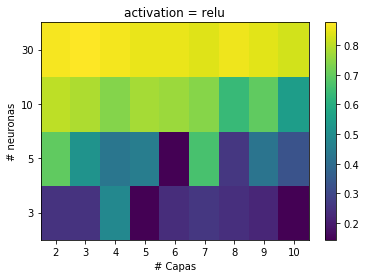

In [14]:
r_testA1
plt.pcolor(r_testA1)
plt.yticks(np.arange(0.5, len(r_testA1.index), 1), r_testA1.index)
plt.xticks(np.arange(0.5, len(r_testA1.columns), 1), r_testA1.columns)
plt.colorbar()
plt.title('activation = relu')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

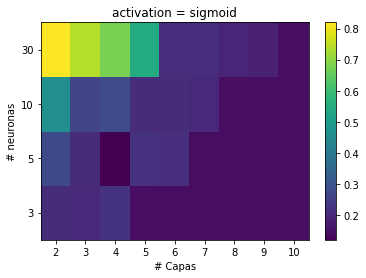

In [15]:
r_testA2
plt.pcolor(r_testA2)
plt.yticks(np.arange(0.5, len(r_testA2.index), 1), r_testA2.index)
plt.xticks(np.arange(0.5, len(r_testA2.columns), 1), r_testA2.columns)
plt.colorbar()
plt.title('activation = sigmoid')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

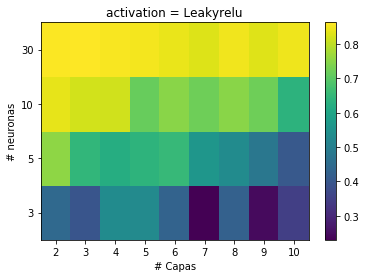

In [16]:
r_testA3
plt.pcolor(r_testA3)
plt.yticks(np.arange(0.5, len(r_testA3.index), 1), r_testA3.index)
plt.xticks(np.arange(0.5, len(r_testA3.columns), 1), r_testA3.columns)
plt.colorbar()
plt.title('activation = Leakyrelu')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

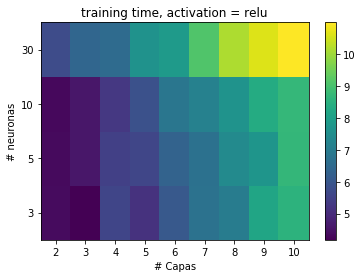

In [17]:
r_testT1
r_testT1
plt.pcolor(r_testT1)
plt.yticks(np.arange(0.5, len(r_testA3.index), 1), r_testA3.index)
plt.xticks(np.arange(0.5, len(r_testA3.columns), 1), r_testA3.columns)
plt.colorbar()
plt.title('training time, activation = relu')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

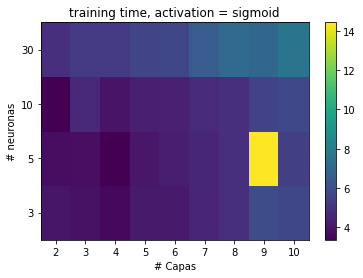

In [18]:
r_testT2
plt.pcolor(r_testT2)
plt.yticks(np.arange(0.5, len(r_testA3.index), 1), r_testA3.index)
plt.xticks(np.arange(0.5, len(r_testA3.columns), 1), r_testA3.columns)
plt.colorbar()
plt.title('training time, activation = sigmoid')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

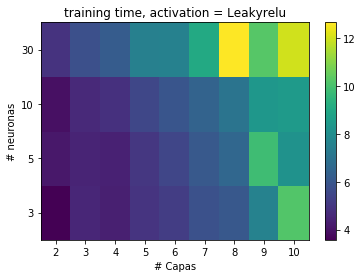

In [19]:
r_testT3
plt.pcolor(r_testT3)
plt.yticks(np.arange(0.5, len(r_testA3.index), 1), r_testA3.index)
plt.xticks(np.arange(0.5, len(r_testA3.columns), 1), r_testA3.columns)
plt.colorbar()
plt.title('training time, activation = Leakyrelu')
plt.xlabel('# Capas')
plt.ylabel('# neuronas')
plt.show()

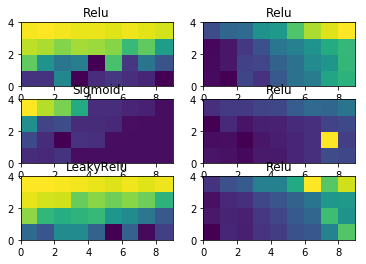

In [20]:
import matplotlib.pyplot as plt

fig=plt.figure()
#fig.title("Heatmap")

f1=fig.add_subplot(321)
f1.pcolor(r_testA1)
f1.title.set_text('Relu')
#plt.colorbar(f1)

f2=fig.add_subplot(323)
f2.pcolor(r_testA2)
f2.title.set_text('Sigmoid')
#plt.colorbar(f2)

f3=fig.add_subplot(325)
f3.pcolor(r_testA3)
f3.title.set_text('LeakyRelu')
#plt.colorbar(f3)

f4=fig.add_subplot(322)
f4.pcolor(r_testT1)
f4.title.set_text('Relu')

f5=fig.add_subplot(324)
f5.pcolor(r_testT2)
f5.title.set_text('Relu')

f6=fig.add_subplot(326)
f6.pcolor(r_testT3)
f6.title.set_text('Relu')
plt.show()

#plt.colorbar(f6,ax6)
#plt.yticks(np.arange(0.5, len(r_test.index), 1), r_test.index)


In [87]:
layers=[2,3,4,5,6,7,8,9,10]
activations=["relu", "sigmoid", "leakyRelu"]
#cuando sea leakyrelu toca poner la fn de activacion directamente =tf.nn.leaky_relu
neuro=[3,5,10,30]
r=[0,0,0,0,0,0,0,0,0]
s=[0,0,0,0,0,0,0,0,0]
lr=[0,0,0,0,0,0,0,0,0]
        
for a in activations:
    if a=='relu':
        for n in [0,1,2,3,4,5,6,7,8]:
            for l in [0,1,2,3]:
                r[n]+=np.array(r_testA1.iloc[l,n])
                
    r[n]/=9

    if a=='sigmoid':
        for n in [0,1,2,3,4,5,6,7,8]:
            for l in [0,1,2,3]:
                s[n]+=np.array(r_testA2.iloc[l,n])
                
    s[n]/=9

    if a=='leakyRelu':
        for n in [0,1,2,3,4,5,6,7,8]:
            for l in [0,1,2,3]:
                lr[n]+=np.array(r_testA3.iloc[l,n])
                
    lr[n]/=9



In [141]:
r

[1.4666666666666666,
 1.8133333333333332,
 0.9866666666666667,
 1.28,
 0.4533333333333333,
 1.16,
 0.4533333333333333,
 0.4533333333333333,
 0.4533333333333333,
 0]

In [142]:
s

[0.72,
 0.6666666666666666,
 0.7866666666666666,
 0.4533333333333333,
 0.4533333333333333,
 0.4533333333333333,
 0.4533333333333333,
 0.4533333333333333,
 0.4533333333333333,
 0]

In [143]:
lr

[1.88,
 1.64,
 2.026666666666667,
 1.8933333333333333,
 1.1866666666666668,
 1.8133333333333332,
 1.0,
 1.5333333333333334,
 1.0266666666666666,
 0]

In [46]:
layers=[2,3,4,5,6,7,8,9,10]
layers1=[2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2]
layers2=[2.4,3.4,4.4,5.4,6.4,7.4,8.4,9.4,10.4]

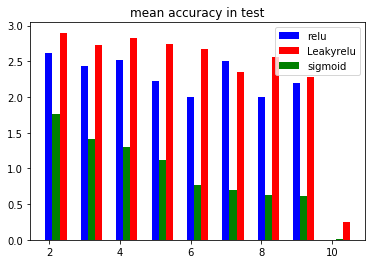

In [88]:
ax = plt.subplot(111)
ax.bar(layers, r, width=0.2,color='b', label='relu')
ax.bar(layers2, lr, width=0.2,color='r', label='Leakyrelu')

ax.bar(layers1, s, width=0.2,color='g', label='sigmoid')

plt.title("mean accuracy in test")
plt.legend()
plt.show()

In [41]:
r_testT1

,2,3,4,5,6,7,8,9,10
3,4.471160,4.490754,4.975682,5.905574,6.287317,6.875630,7.335145,7.780571,8.949683
5,4.489604,4.806472,5.375358,5.852316,6.205827,7.168689,7.495427,8.298495,8.499672
10,4.938597,4.851333,5.471946,6.610244,6.300147,7.460280,7.771602,8.541917,8.948889
30,5.668166,6.365580,7.104553,8.022554,7.984202,9.591400,9.764355,11.124410,11.945088


In [53]:
np.array(r_testT1.iloc[1,:])

array([4.48960376, 4.80647206, 5.37535834, 5.8523159 , 6.205827  ,
       7.16868949, 7.49542713, 8.29849529, 8.49967217])

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,u'Accuracy in test')

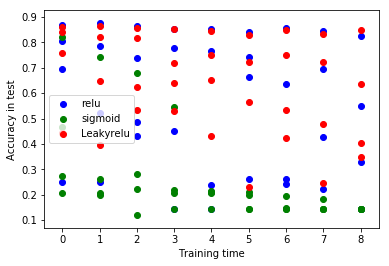

In [32]:
plt.scatter(np.arange(len(np.array(r_testT1.iloc[1,:]))),np.array(r_testA1.iloc[1,:]),c='b')

plt.hold(True)

plt.scatter(np.arange(len(np.array(r_testT1.iloc[2,:]))),np.array(r_testA1.iloc[2,:]),c='b', label='relu')
plt.scatter(np.arange(len(np.array(r_testT1.iloc[3,:]))),np.array(r_testA1.iloc[3,:]),c='b')
plt.scatter(np.arange(len(np.array(r_testT1.iloc[0,:]))),np.array(r_testA1.iloc[0,:]),c='b')

plt.scatter(np.arange(len(np.array(r_testT2.iloc[0,:]))),np.array(r_testA2.iloc[0,:]),c='g',label='sigmoid')
plt.scatter(np.arange(len(np.array(r_testT2.iloc[1,:]))),np.array(r_testA2.iloc[1,:]),c='g')
plt.scatter(np.arange(len(np.array(r_testT2.iloc[2,:]))),np.array(r_testA2.iloc[2,:]),c='g')
plt.scatter(np.arange(len(np.array(r_testT2.iloc[3,:]))),np.array(r_testA2.iloc[3,:]),c='g')

plt.scatter(np.arange(len(np.array(r_testT3.iloc[0,:]))),np.array(r_testA3.iloc[0,:]),c='r',label='Leakyrelu')
plt.scatter(np.arange(len(np.array(r_testT3.iloc[1,:]))),np.array(r_testA3.iloc[1,:]),c='r')
plt.scatter(np.arange(len(np.array(r_testT3.iloc[2,:]))),np.array(r_testA3.iloc[2,:]),c='r')
plt.scatter(np.arange(len(np.array(r_testT3.iloc[3,:]))),np.array(r_testA3.iloc[3,:]),c='r')

plt.legend()

plt.xlabel('Training time')
plt.ylabel('Accuracy in test')

In [96]:
r=[0,0,0,0,0,0,0,0,0,0]
s=[0,0,0,0,0,0,0,0,0,0]
lr=[0,0,0,0,0,0,0,0,0,0]
r[0]=np.array(r_testA1.iloc[:,0])+np.array(r_testA1.iloc[:,1])+np.array(r_testA1.iloc[:,2])+np.array(r_testA1.iloc[:,3])
r[0]np.mean(r[0])

In [97]:
r

[array([1.38666667, 1.98333333, 3.18666667, 3.45333333]),
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [98]:
np.array(r_testA1.iloc[:,3])

array([0.32      , 0.32      , 0.74333333, 0.86333333])

In [99]:
np.mean(r[0])

2.5025

In [129]:
r_testA1.iloc[:,6]

3     0.113333
5     0.490000
10    0.730000
30    0.830000
Name: 8, dtype: float64